# By: seher mubeen

## the sparks foundation 
## task 2 prediction using unsupervised ML

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [102]:
greetings = 'Assalam o Alaikum: welcome to my work'
print(greetings)

Assalam o Alaikum: welcome to my work


## import some important ibraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


## data read

In [17]:
iris = 'Iris.csv'
df = pd.read_csv(iris,index_col = 0) 
df.head() #by default it only shows the first 5 value of data set u can change it by yourself


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe() #it describe the statistical summary of our data set

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape #it shows the dimention of data

(150, 5)

In [7]:
df['Species'].nunique()

3

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum() #check null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [61]:
df1  = df.loc[:,'SepalLengthCm':'PetalWidthCm']
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


# check outliers

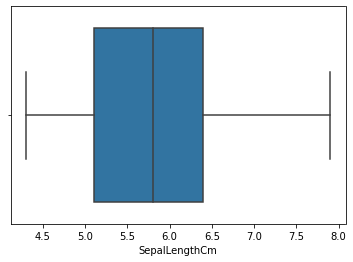

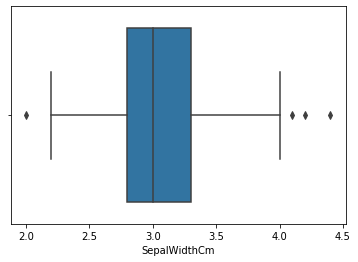

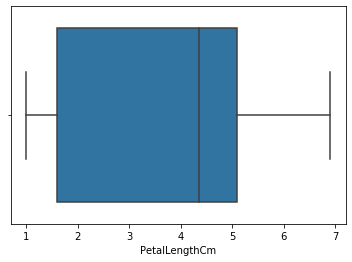

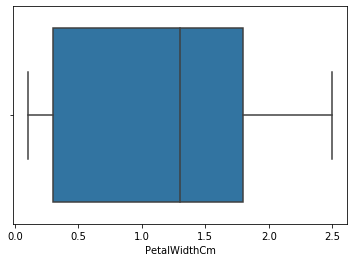

In [11]:
for i in df1.describe().columns:
    sns.boxplot(df1[i])
    plt.show()
    

here we can clearly seen that the sepalwidth have outlier we can remove it by removing specific row

# lable encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

# data visualization

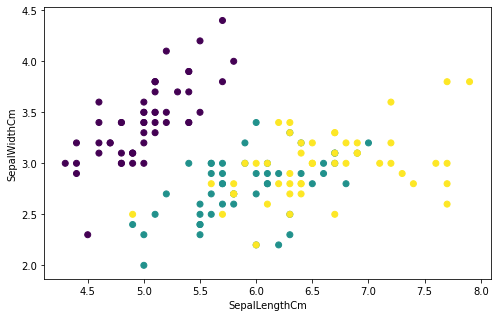

In [13]:
fig ,ax = plt.subplots(figsize = (8,5))
ax.scatter(data =df,x ='SepalLengthCm',y ='SepalWidthCm',c='Species')
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
plt.show()

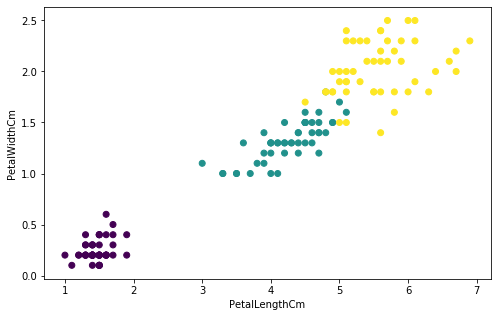

In [34]:
fig ,ax = plt.subplots(figsize = (8,5))
ax.scatter(data =df,x ='PetalLengthCm',y ='PetalWidthCm',c='Species')
ax.set_xlabel("PetalLengthCm")
ax.set_ylabel("PetalWidthCm")
plt.show()

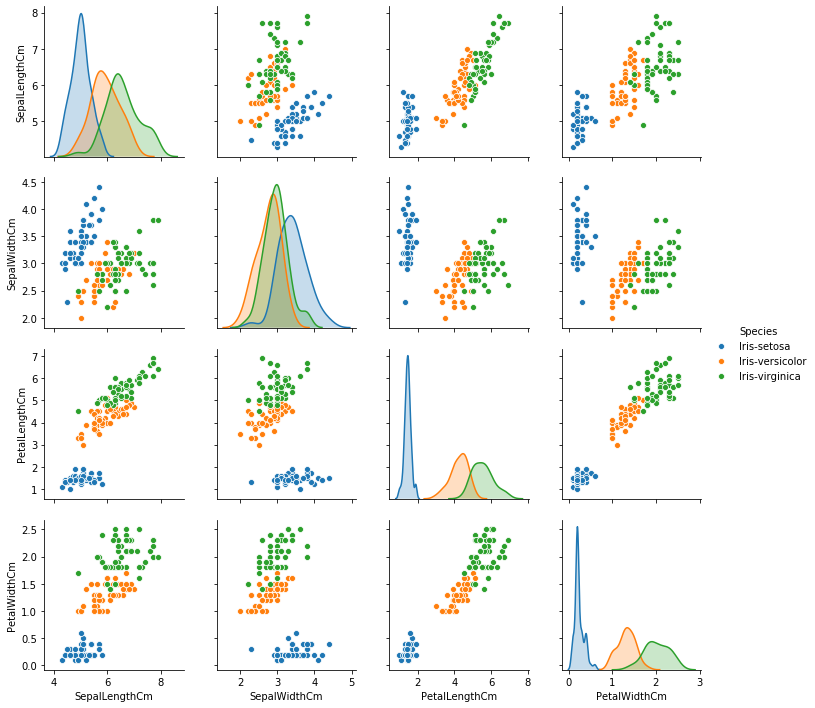

In [18]:
sns.pairplot(data = df,hue= 'Species')

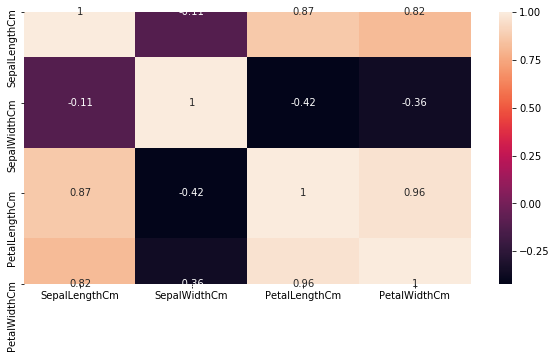

In [101]:
#cor = df1.corr()
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr() , annot = True)
#plt.show()

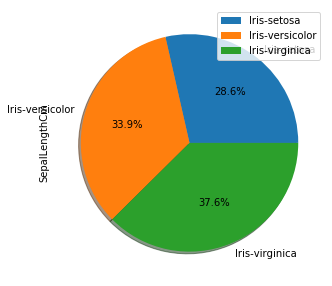

In [22]:
df.groupby(['Species']).sum().plot(kind = 'pie',y = 'SepalLengthCm',figsize=(10,5),autopct='%1.1f%%',shadow = True)
#this shows that verginicar has more sepal length than other we can observe it on its %

Text(0.5, 1.0, 'check the highest sepalllengthcm of species')

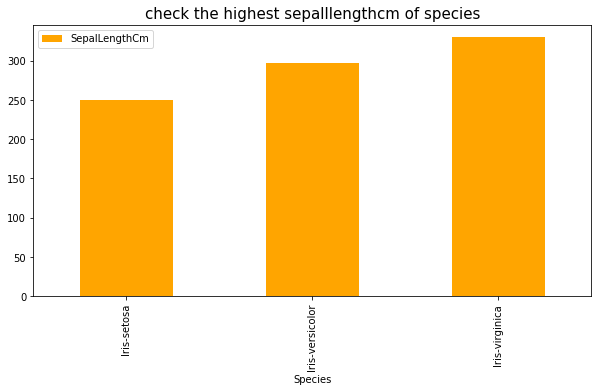

In [23]:
df.groupby(['Species']).sum().plot(kind = 'bar',y = 'SepalLengthCm',figsize=(10,5),color = "orange")
plt.title("check the highest sepalllengthcm of species",size = 15)

# elbow method using within cluster sum of square


In [70]:
x = df.drop(['Species'],axis = 1) #input features
y = df['Species'] #targeted feature


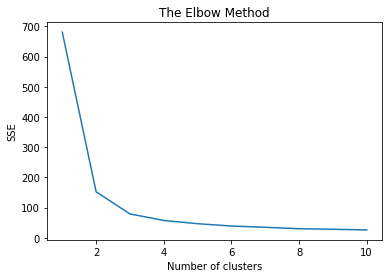

In [71]:
k_range = range(1,11)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=300, random_state = 25)
    kmeans.fit(x)
    sse.append(kmeans.inertia_) # here inertia_ will calculate the sum of squared errors low inertia has best point

# Plotting the results onto a line graph to observe the elbow
plt.plot(k_range,sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # within cluster sum of squared errors
plt.show()

The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minima

# standerdization

In [30]:
from sklearn.preprocessing import StandardScaler
stan_sc = StandardScaler()
stan_sc.fit_transform(x)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [31]:
np.shape(x)

(150, 4)

In [ ]:
#scaled feature

In [32]:
kmeans = KMeans(n_clusters = 3, init ='k-means++',random_state = 0)
y_kmean = kmeans.fit(x)

In [33]:
print("the total iteration of clusters ara: {}".format(y_kmean.n_iter_))
print("the centroids are\n :{}".format(y_kmean.cluster_centers_))

the total iteration of clusters ara: 4
the centroids are
 :[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


# GaussianNB algorithm

### import related libraries

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [35]:
xtrain , xtest ,ytrain , ytest = train_test_split(x,y, test_size = 0.3 ,random_state = 45)

In [36]:
gn_model = GaussianNB()

In [37]:
gn_model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
pred = gn_model.predict(xtest)

In [39]:
ac_pre = pd.DataFrame({'actual': ytest ,'prdict': pred})
ac_pre.head()

,actual,prdict
Id,,
1,Iris-setosa,Iris-setosa
44,Iris-setosa,Iris-setosa
130,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
35,Iris-setosa,Iris-setosa


In [40]:
#accuracy
acuracy =  accuracy_score(ytest ,pred)
acuracy

0.9555555555555556

# Visualising the Clusters

In [89]:
x=df.iloc[:,[0,1,2,3]].values

In [90]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 45)
y_kmeans = kmeans.fit_predict(x)

In [74]:
kmeans.cluster_centers_[:,2]

array([5.74210526, 1.464     , 4.39354839])

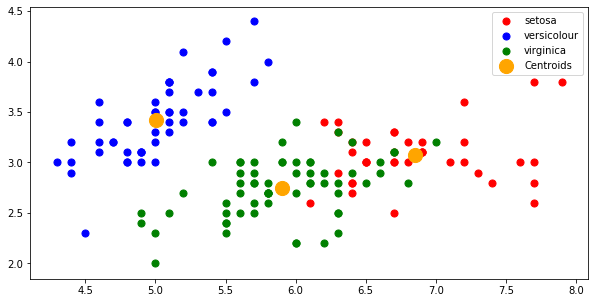

In [92]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10, 5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'orange', label = 'Centroids')
plt.legend()


# thank you 